In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnist-dataset/train-images.idx3-ubyte
/kaggle/input/mnist-dataset/t10k-labels.idx1-ubyte
/kaggle/input/mnist-dataset/t10k-images.idx3-ubyte
/kaggle/input/mnist-dataset/train-labels.idx1-ubyte
/kaggle/input/mnist-dataset/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte
/kaggle/input/mnist-dataset/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte
/kaggle/input/mnist-dataset/train-labels-idx1-ubyte/train-labels-idx1-ubyte
/kaggle/input/mnist-dataset/train-images-idx3-ubyte/train-images-idx3-ubyte


# Libraries to be used

In [2]:
import tensorflow as tf
from keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split

# Load Data

In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
# normalising the dimensions of images to increase the performance of cnn

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [5]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the images
train_images, test_images = train_images / 255.0, test_images / 255.0

# Use only 60% of the dataset
train_images, train_labels = train_images[:int(0.1 * len(train_images))], train_labels[:int(0.1 * len(train_labels))]

# Convert images to 3-channel (RGB) and resize to 224x224 for VGG16
def preprocess_images(images):
    images = tf.expand_dims(images, axis=-1)  # Add channel dimension
    images = tf.image.grayscale_to_rgb(images)  # Convert to RGB
    images = tf.image.resize(images, [224, 224])  # Resize to 224x224
    return images.numpy()

train_images = preprocess_images(train_images)
test_images = preprocess_images(test_images)

# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

# Split train data into train and validation sets (80-20 split of 60% dataset)
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

In [6]:
random_index = np.random.randint(0,len(train_images))
random_image = train_images[random_index]
random_label = train_labels[random_index]

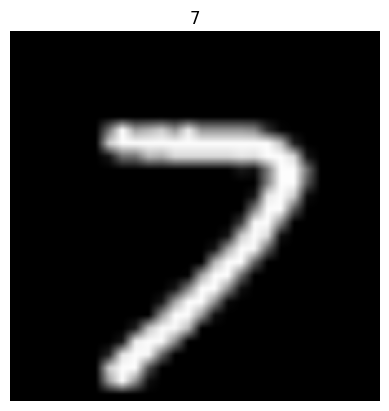

In [7]:
random_index = np.random.randint(0, len(train_images))
random_image = train_images[random_index]
random_label = train_labels[random_index]

plt.imshow(random_image, cmap='gray')  # Use 'gray' for MNIST images
plt.axis('off')
plt.title(np.argmax(random_label))  # Convert one-hot label back to a class index
plt.show()

In [8]:
random_image.shape

(224, 224, 3)

In [9]:
labels = str(list(range(0,10)))
labels

'[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]'

In [10]:
num_samples = 12
random_indices = np.random.choice(train_images.shape[0], num_samples, replace=False)
sample_images = train_images[random_indices]
sample_labels = train_labels[random_indices]

In [11]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [12]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the VGG16 base layers
for layer in vgg_base.layers:
    layer.trainable = False

# Add custom layers on top of VGG16
x = Flatten()(vgg_base.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(10, activation='softmax')(x)  # 10 classes for MNIST

# Create final model
model = Model(inputs=vgg_base.input, outputs=output)
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [13]:
# Train the model without using ImageDataGenerator
history = model.fit(
    X_train, y_train,  # Directly use the training data
    validation_data=(X_val, y_val),  # Directly use the validation data
    epochs=10,
    batch_size=32  # Set batch size here
)

Epoch 1/10


I0000 00:00:1732959039.961863      69 service.cc:145] XLA service 0x7f55ec0047e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732959039.961916      69 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1732959039.961920      69 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  1/150 ━━━━━━━━━━━━━━━━━━━━ 38:26 15s/step - accuracy: 0.0938 - loss: 2.7987

I0000 00:00:1732959054.138882      69 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


150/150 ━━━━━━━━━━━━━━━━━━━━ 48s 217ms/step - accuracy: 0.3503 - loss: 1.9597 - val_accuracy: 0.9508 - val_loss: 0.4753
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 23s 151ms/step - accuracy: 0.5988 - loss: 0.9942 - val_accuracy: 0.9642 - val_loss: 0.2733
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 24s 157ms/step - accuracy: 0.6497 - loss: 0.8909 - val_accuracy: 0.9692 - val_loss: 0.1930
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 25s 166ms/step - accuracy: 0.6681 - loss: 0.8328 - val_accuracy: 0.9742 - val_loss: 0.1677
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 26s 175ms/step - accuracy: 0.6651 - loss: 0.7820 - val_accuracy: 0.9733 - val_loss: 0.1155
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 25s 166ms/step - accuracy: 0.6608 - loss: 0.7849 - val_accuracy: 0.9775 - val_loss: 0.1196
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 25s 166ms/step - accuracy: 0.6952 - loss: 0.7416 - val_accuracy: 0.9783 - val_loss: 0.0929
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 25s 170ms/step - accuracy: 0.6978 - loss: 0.7013 - val

In [14]:

from tensorflow.keras.optimizers import Adagrad

In [15]:
# Modeling
model.compile(optimizer='Adagrad', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,927,370 (68.39 MB)

 Trainable params: 3,212,682 (12.26 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [17]:
loss,accuracy = model.evaluate(X_train,y_train)
print(f"The model accuracy is : {accuracy} \n the model loss : {loss}")

150/150 ━━━━━━━━━━━━━━━━━━━━ 21s 136ms/step - accuracy: 0.9954 - loss: 0.0330
The model accuracy is : 0.9958333373069763 
 the model loss : 0.035381682217121124


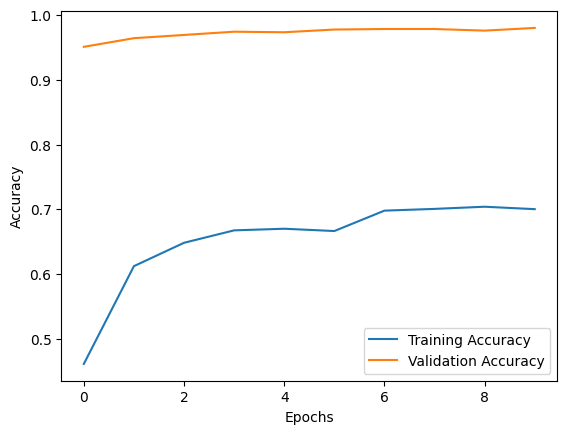

In [18]:
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.legend()
plt.show()

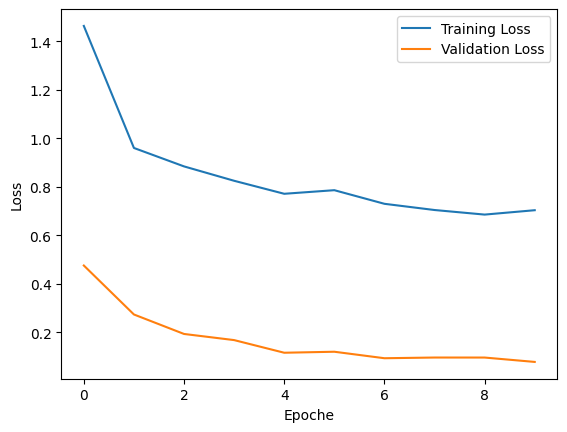

In [19]:
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel("Epoche")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [20]:
import numpy as np

# Predict the class probabilities for the test dataset
predictions = model.predict(X_val)

# Convert probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_val, axis=1)  # Convert one-hot to class indices

38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 149ms/step


In [21]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate the confusion matrix
true_labels = np.argmax(y_val, axis=1)  # Convert one-hot encoded to class indices
predicted_labels = np.argmax(predictions, axis=1)  # Already converting probabilities to class indices
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

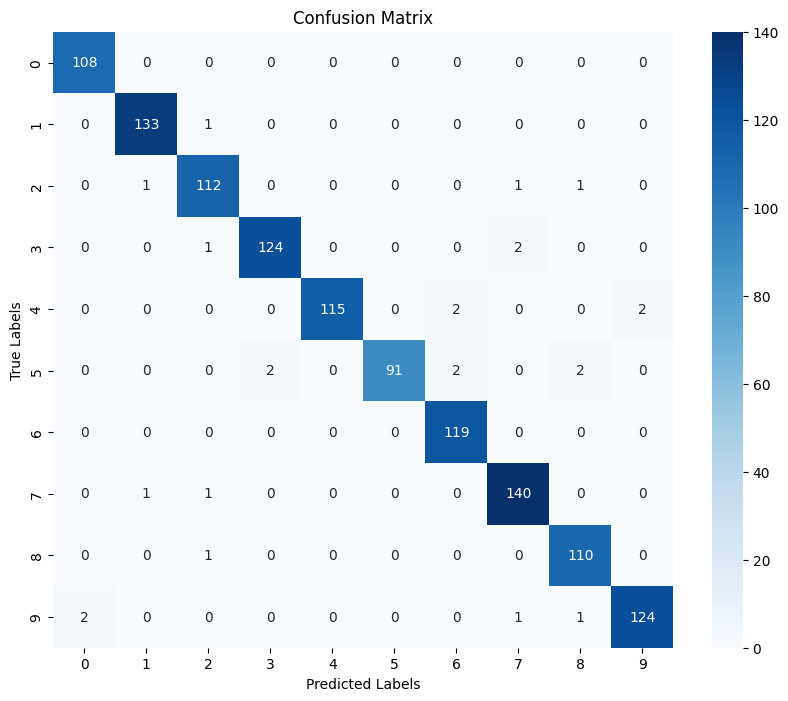

In [22]:
# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [23]:
from sklearn.metrics import classification_report

# Générer le rapport de classification
report = classification_report(
    true_labels, 
    predicted_labels, 
    target_names=[str(i) for i in range(10)]
)
print("Rapport de classification :")
print(report)

Rapport de classification :
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       108
           1       0.99      0.99      0.99       134
           2       0.97      0.97      0.97       115
           3       0.98      0.98      0.98       127
           4       1.00      0.97      0.98       119
           5       1.00      0.94      0.97        97
           6       0.97      1.00      0.98       119
           7       0.97      0.99      0.98       142
           8       0.96      0.99      0.98       111
           9       0.98      0.97      0.98       128

    accuracy                           0.98      1200
   macro avg       0.98      0.98      0.98      1200
weighted avg       0.98      0.98      0.98      1200

